In [ ]:
####
#Title: Stock_Model_NN
#Author: Guo Zebin

#Description: This is stock prediction model using ML models
#             Use NN and multiple features
#Evaluation: Using MSE
#Conclusion: NN performs far more better than lr and tree
#Discussion: 1. parameter adjustment? 2. does these features reasonable as training data?

In [ ]:
#Import all the library used
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [ ]:
#load the data from local environment
from google.colab import files
uploaded = files.upload()

Saving netflix.csv to netflix.csv


In [ ]:
#store the data into df
df = pd.read_csv('netflix.csv')

In [ ]:
# get the size of data
df.shape

(4881, 7)

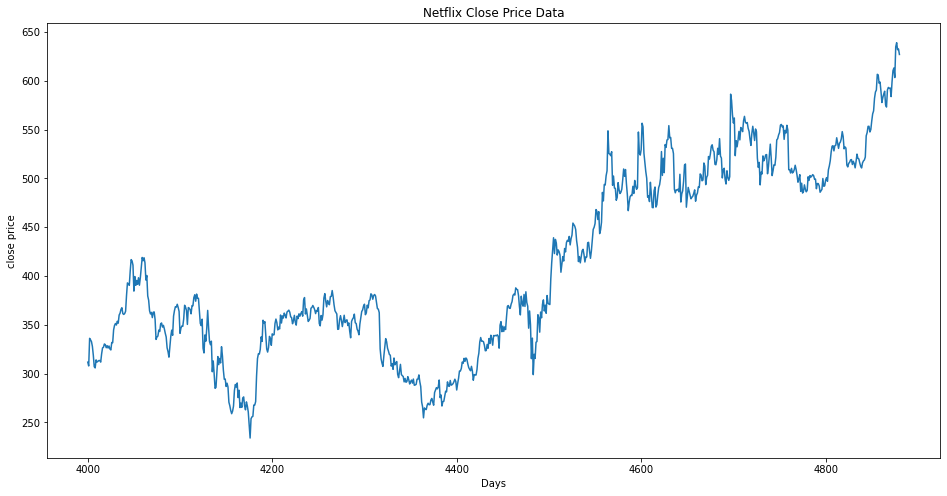

In [ ]:
#visualise the close price data
plt.figure(figsize=(16,8))
plt.title('Netflix Close Price Data')
plt.xlabel('Days')
plt.ylabel('close price')
plt.plot(df['Close'][4000:])
plt.show()

In [ ]:
# Drop out the useless data
df = df.drop(['Date','Adj Close'],1)

In [ ]:
# Implement the feature scaling
scaler = MinMaxScaler()
df = scaler.fit_transform(df)
random.shuffle(df)
df

array([[0.00128729, 0.00126767, 0.00121301, 0.0012894 , 0.32341447],
       [0.00125967, 0.00134924, 0.00130315, 0.00131064, 0.03348267],
       [0.00127072, 0.0012858 , 0.00130204, 0.00122789, 0.01957055],
       ...,
       [0.14907939, 0.15093026, 0.14905637, 0.14951165, 0.02060265],
       [0.02393478, 0.02371196, 0.02372932, 0.02341264, 0.0483068 ],
       [0.01014916, 0.0102037 , 0.01023489, 0.01010715, 0.05159528]])

In [ ]:
# Stretch out the training and testing data
X = df[:,[0,1,2,4]]
y = df[:,[3]]
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

In [ ]:
# create NN model(figure out what each parameters are doing IMPORTANT!)
model = Sequential()
model.add(Dense(12, input_dim=4, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='relu'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 12)                60        
                                                                 
 dense_4 (Dense)             (None, 8)                 104       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 173
Trainable params: 173
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Now do the trainging(this is one of the judgement of parameter adjustment)
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(X_train,y_train,epochs = 50,batch_size = 10)

Epoch 1/50
391/391 [==============================] - 3s 4ms/step - loss: 8.4856e-04
Epoch 2/50
391/391 [==============================] - 1s 3ms/step - loss: 2.6393e-05
Epoch 3/50
391/391 [==============================] - 1s 3ms/step - loss: 1.0330e-05
Epoch 4/50
391/391 [==============================] - 1s 3ms/step - loss: 8.1333e-06
Epoch 5/50
391/391 [==============================] - 1s 2ms/step - loss: 7.3335e-06
Epoch 6/50
391/391 [==============================] - 1s 2ms/step - loss: 9.0539e-06
Epoch 7/50
391/391 [==============================] - 1s 3ms/step - loss: 6.8416e-06
Epoch 8/50
391/391 [==============================] - 2s 4ms/step - loss: 1.0299e-05
Epoch 9/50
391/391 [==============================] - 1s 1ms/step - loss: 7.8834e-06
Epoch 10/50
391/391 [==============================] - 1s 1ms/step - loss: 9.3999e-06
Epoch 11/50
391/391 [==============================] - 1s 1ms/step - loss: 7.7004e-06
Epoch 12/50
391/391 [==============================] - 1s 1ms/s

In [ ]:
X_test.shape

(977, 4)

In [ ]:
# Do the prediction
y_predict = model.predict(X_test)
y_predict[:10]


array([[0.00478065],
       [0.00222777],
       [0.00174513],
       [0.00535715],
       [0.00081377],
       [0.00847705],
       [0.00187132],
       [0.00354711],
       [0.00618168],
       [0.00162891]], dtype=float32)

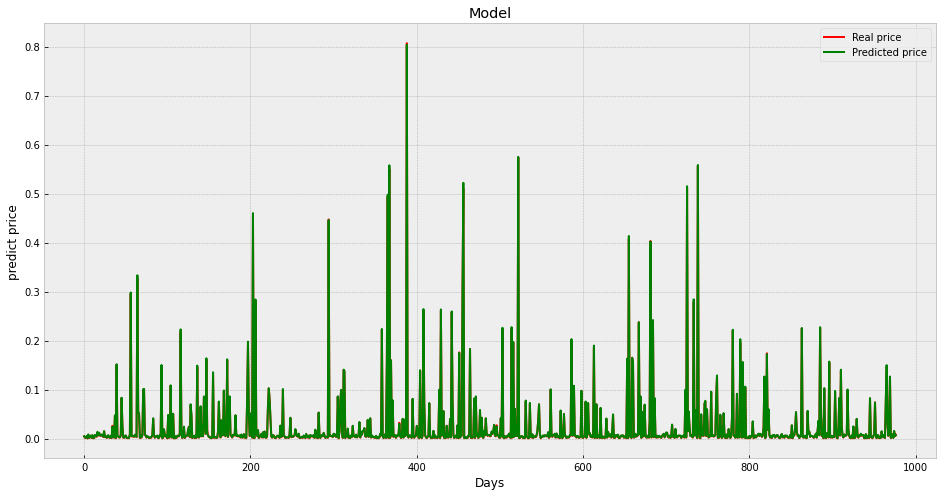

In [ ]:
##visualise the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('predict price')
plt.plot(y_test, color = 'red', label = 'Real price')
plt.plot(y_predict, color = 'green', label = 'Predicted price')
plt.legend()
plt.style.use('bmh')
plt.show()

In [ ]:
#find the MSE
print('MSE:')
print(mean_squared_error(y_test, y_predict))

MSE:
1.4494492695968947e-06
